In [1]:
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'Probabilities')

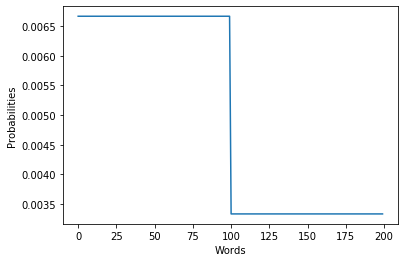

In [32]:
n=200
lol = np.hstack([np.ones(n//2), np.ones(n//2)*0.5])
plt.plot(lol/lol.sum())
plt.xlabel('Words')
plt.ylabel('Probabilities')

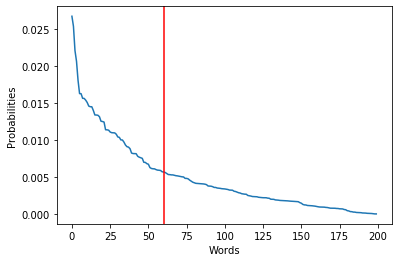

In [46]:
test = np.random.exponential(1, n)
test = -np.sort(-test)
plt.plot(test/ test.sum())
plt.axvline(60, c='red')
plt.xlabel('Words')
plt.ylabel('Probabilities')
plt.gcf().savefig('ImageOutputs/ExpDropOff.png', dpi=250)

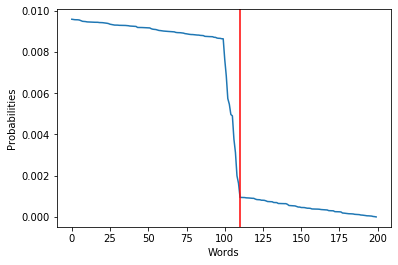

In [49]:
test = np.hstack([np.random.uniform(0.9,1, 100), np.random.uniform(0,0.8, 10), np.random.uniform(0,0.1, 90)])
test = -np.sort(-test)
plt.plot(test/ test.sum())
plt.xlabel('Words')
plt.axvline(110, c='red')
plt.ylabel('Probabilities')
plt.gcf().savefig('ImageOutputs/UniformDropOff.png', dpi=250)